## <b>Importing the necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from pandas.api.types import is_numeric_dtype

## <b>Reading the file

In [5]:
path = "C:/Users/Hani Desai/OneDrive/Desktop/Hani/Sem 4/Data.csv"
telewire = pd.read_csv(path,encoding='windows-1254')
target = telewire["Unusual"]                      #defining the labels
features = telewire.drop(["Unusual"], axis=1)     #defining target variable
telewire.head()

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
0,10:45,3BLTE,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,4.0,3.0,7,1
1,9:45,1BLTE,21.791,1.891,0.537,0.268,10.273,1.154,1.353,1.085,6.0,4.0,10,1
2,7:45,9BLTE,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,1.0,1.0,2,1
3,2:45,4ALTE,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,2.0,2.0,4,1
4,3:30,10BLTE,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,2.0,1.0,3,0


### Check the data types of features

In [6]:
telewire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36904 entries, 0 to 36903
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         36904 non-null  object 
 1   CellName     36904 non-null  object 
 2   PRBUsageUL   36904 non-null  float64
 3   PRBUsageDL   36904 non-null  float64
 4   meanThr_DL   36904 non-null  float64
 5   meanThr_UL   36904 non-null  float64
 6   maxThr_DL    36904 non-null  float64
 7   maxThr_UL    36904 non-null  float64
 8   meanUE_DL    36904 non-null  float64
 9   meanUE_UL    36904 non-null  float64
 10  maxUE_DL     36815 non-null  float64
 11  maxUE_UL     36815 non-null  float64
 12  maxUE_UL+DL  36899 non-null  object 
 13  Unusual      36904 non-null  int64  
dtypes: float64(10), int64(1), object(3)
memory usage: 3.9+ MB


* <b> Here, maxUE_UL+DL column type is object so we have to convert it into numerical data type.

In [7]:
telewire['maxUE_UL+DL'] = pd.to_numeric(telewire['maxUE_UL+DL'], errors='coerce')

* <b> Checking maxUE_UL+DL datatype coverted in float

In [8]:
telewire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36904 entries, 0 to 36903
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         36904 non-null  object 
 1   CellName     36904 non-null  object 
 2   PRBUsageUL   36904 non-null  float64
 3   PRBUsageDL   36904 non-null  float64
 4   meanThr_DL   36904 non-null  float64
 5   meanThr_UL   36904 non-null  float64
 6   maxThr_DL    36904 non-null  float64
 7   maxThr_UL    36904 non-null  float64
 8   meanUE_DL    36904 non-null  float64
 9   meanUE_UL    36904 non-null  float64
 10  maxUE_DL     36815 non-null  float64
 11  maxUE_UL     36815 non-null  float64
 12  maxUE_UL+DL  36815 non-null  float64
 13  Unusual      36904 non-null  int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 3.9+ MB


## <b>Finding out the target variable distribution in the dataset

In [9]:
usual = len(telewire[telewire.Unusual == 0])           
unusual = len(telewire[telewire.Unusual == 1])
usual_percent = ( usual / (usual + unusual)) * 100
unusual_percent = (unusual / (usual + unusual)) * 100
print("Percentage of Usual transactions: {:.4f}".format(usual_percent))
print("Percentage of Unusual transactions: {:.4f}".format(unusual_percent))

Percentage of Usual transactions: 72.4068
Percentage of Unusual transactions: 27.5932


## <b>Plotting the distribution

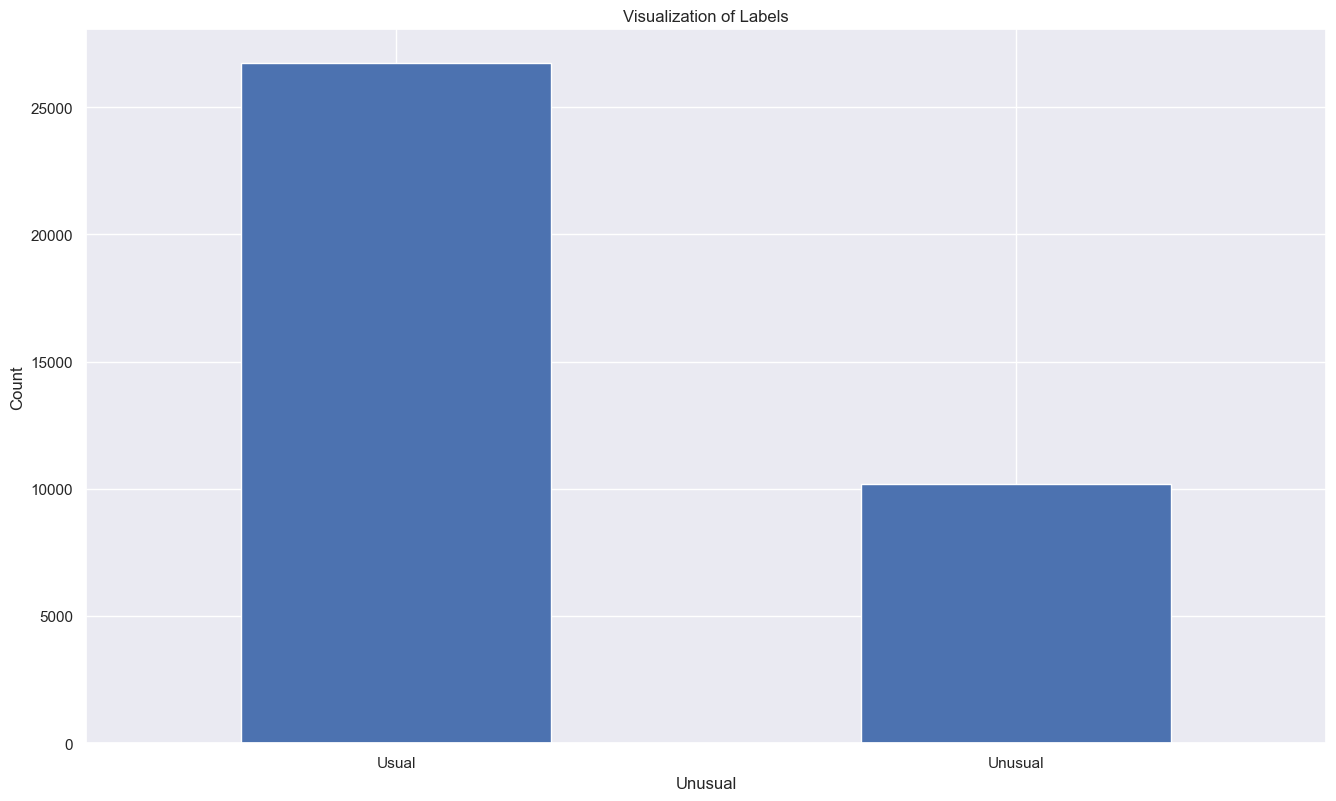

In [10]:
labels = ["Usual", "Unusual"]
count_classes = telewire.value_counts(telewire['Unusual'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

* <b> As we can see in above bar plot that the data is imbalanced to a cetain extent. So, We will apply some techniques to balance the dataset

## <b> EDA on Original data

In [11]:
features.isna().sum()

Time            0
CellName        0
PRBUsageUL      0
PRBUsageDL      0
meanThr_DL      0
meanThr_UL      0
maxThr_DL       0
maxThr_UL       0
meanUE_DL       0
meanUE_UL       0
maxUE_DL       89
maxUE_UL       89
maxUE_UL+DL     5
dtype: int64

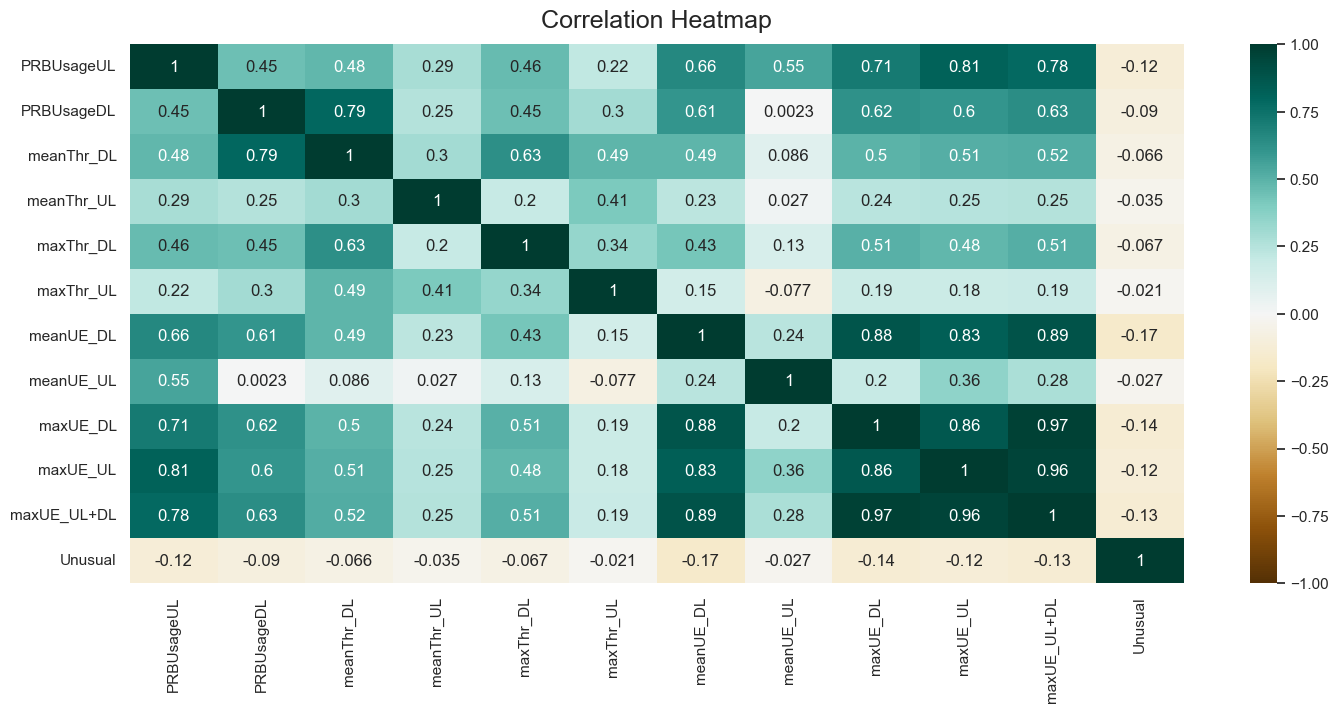

In [17]:
plt.figure(figsize=(17, 7))
heatmap = sns.heatmap(telewire.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

* <b> If the value is 1, it is said to be a positive correlation between two variables. This means that when one variable increases,  the other variable also increases.
* <b> If the value is -1, it is said to be a negative correlation between the two variables. This means that when one variable increases, the other variable decreases.
* <b> If the value is 0, there is no correlation between the two variables. This means that the variables changes in a random manner with respect to each other.

## Outlier Detection box plot

<AxesSubplot:>

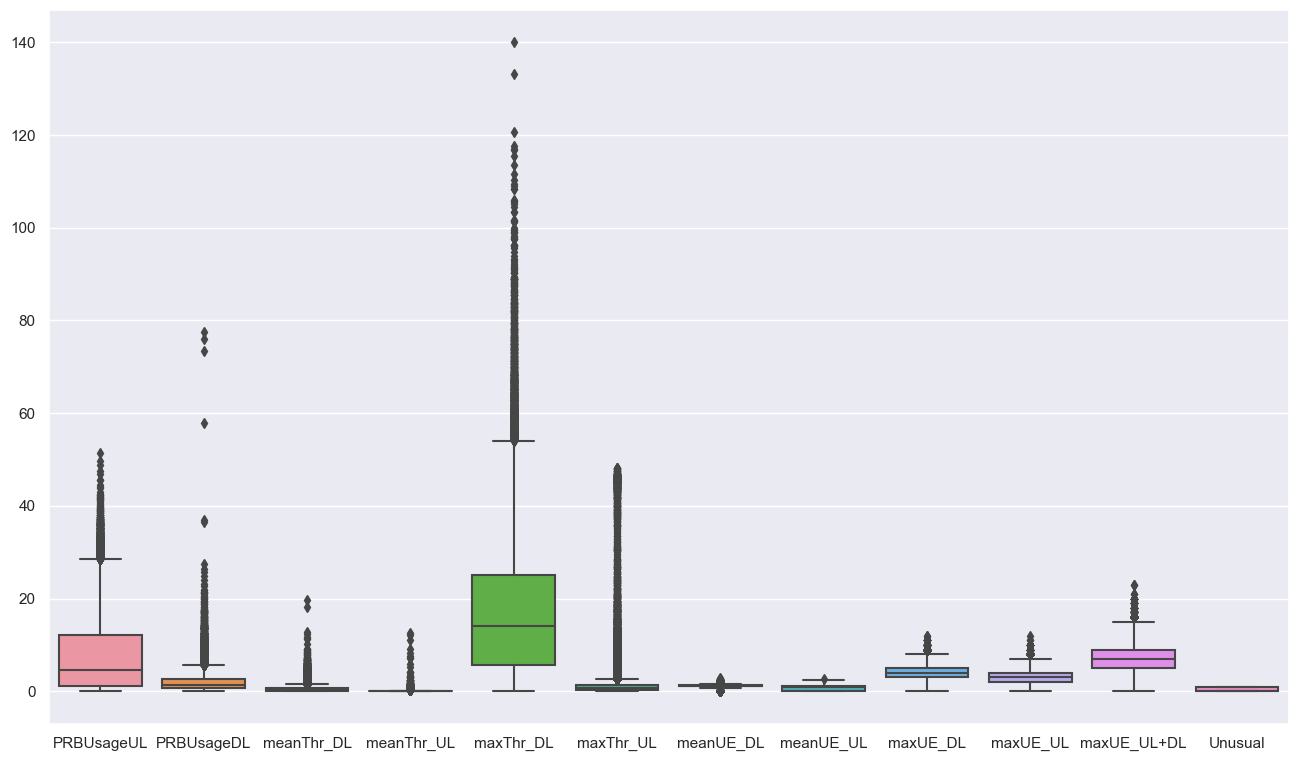

In [16]:
#box plot for outlier detection
sns.set(rc={'figure.figsize':(16,9.27)})
sns.boxplot(data=telewire)

* <b> As we can see in above box plot that there are outliers in almost every features so we will remove the outliers in data preprocessing task. 